In [1]:
# Import the machine learning libraries.
import numpy as np
import keras as K
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Activation, Embedding
from keras.layers import GRU
from keras.datasets import imdb

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
max_words = 20000

# Load the IMDB review sentiment dataset.
# Split the dataset into the training set and test subsets.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

17465344/17464789 [==============================] - 1s 0us/step
(25000,) (25000,) (25000,) (25000,)
CPU times: user 4.29 s, sys: 290 ms, total: 4.58 s
Wall time: 7.65 s


In [3]:
max_review_length = 100
X_train = K.preprocessing.sequence.pad_sequences(X_train, truncating='pre', padding='pre', maxlen=max_review_length)
X_test = K.preprocessing.sequence.pad_sequences(X_test, truncating='pre', padding='pre', maxlen=max_review_length)

print(X_train.shape, X_test.shape)

(25000, 100) (25000, 100)


In [4]:
# Build the model.
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_words))
model.add(GRU(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20000, 100)        2000000   
_________________________________________________________________
gru (GRU)                    (None, 100)               60600     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,060,701
Trainable params: 2,060,701
Non-trainable params: 0
_________________________________________________________________


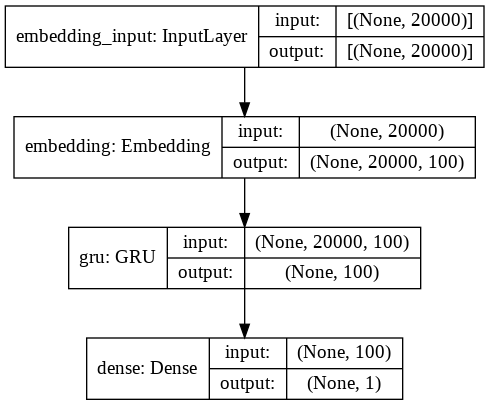

In [5]:
# Visualize.
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [6]:
# Train the model.
%%time
batch_size = 32
model.fit(X_train, y_train, batch_size = batch_size, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
782/782 [==============================] - 28s 27ms/step - loss: 0.5108 - accuracy: 0.7284 - val_loss: 0.3726 - val_accuracy: 0.8371
Epoch 2/10
782/782 [==============================] - 20s 26ms/step - loss: 0.2179 - accuracy: 0.9174 - val_loss: 0.3367 - val_accuracy: 0.8564
Epoch 3/10
782/782 [==============================] - 20s 26ms/step - loss: 0.1105 - accuracy: 0.9613 - val_loss: 0.4470 - val_accuracy: 0.8475
Epoch 4/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0597 - accuracy: 0.9799 - val_loss: 0.5310 - val_accuracy: 0.8371
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0317 - accuracy: 0.9907 - val_loss: 0.5997 - val_accuracy: 0.8413
Epoch 6/10
782/782 [==============================] - 21s 26ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.7632 - val_accuracy: 0.8334
Epoch 7/10
782/782 [==============================] - 20s 26ms/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.8842 - val_accuracy:

In [7]:
# Evaluate the model.
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 3s 4ms/step - loss: 0.9713 - accuracy: 0.8320
Test score: 0.9712767004966736
Test accuracy: 0.8320000171661377


In [8]:
review = "The movie was a great waste of time."
print(f'New review: {review}')

New review: The movie was a great waste of time.


In [9]:
d = imdb.get_word_index()
words = review.split()
review = []
for word in words:
    if word not in d:
        review.append(2)
    else:
        review.append(d[word] + 3)
print(f'review = {review}')
review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=max_review_length)
prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

1646592/1641221 [==============================] - 0s 0us/step
review = [2, 20, 16, 6, 87, 437, 7, 2]
Prediction (0 = Negative, 1 = positive) = [[0.42742285]]


In [10]:
review = "It was a great movie"
print(f'New review: {review}')

New review: It was a great movie


In [11]:
d = imdb.get_word_index()
words = review.split()
review = []
for word in words:
    if word not in d:
        review.append(2)
    else:
        review.append(d[word] + 3)
print(f'review = {review}')
review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=max_review_length)
prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

review = [2, 16, 6, 87, 20]
Prediction (0 = Negative, 1 = positive) = [[0.93295264]]


In [12]:
review = "It is not period drama, of course. It's anti-period and anti-historical. But I actually like the concept of this fantasy world where Jane Austin is mixed with cocaine & modern language. So the concept is fine."
print(f'New review: {review}')

New review: It is not period drama, of course. It's anti-period and anti-historical. But I actually like the concept of this fantasy world where Jane Austin is mixed with cocaine & modern language. So the concept is fine.


In [13]:
d = imdb.get_word_index()
words = review.split()
review = []
for word in words:
    if word not in d:
        review.append(2)
    else:
        review.append(d[word] + 3)
print(f'review = {review}')
review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=max_review_length)
prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

review = [2, 9, 24, 810, 2, 7, 2, 2, 2, 5, 2, 2, 2, 165, 40, 4, 1120, 7, 14, 939, 182, 121, 2, 2, 9, 1849, 19, 7602, 2, 682, 2, 2, 4, 1120, 9, 2]
Prediction (0 = Negative, 1 = positive) = [[0.97895503]]
